### Import libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.metrics import classification_report
import random
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score 
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import re
import string
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")
# def plot_feature_importance(importance,names,model_type):

#     #Create arrays from feature importance and feature names
#     feature_importance = np.array(importance)
#     feature_names = np.array(names)

#     #Create a DataFrame using a Dictionary
#     data={'feature_names':feature_names,'feature_importance':feature_importance}
#     fi_df = pd.DataFrame(data)

#     #Sort the DataFrame in order decreasing feature importance
#     fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#     #Define size of bar plot
#     plt.figure(figsize=(10,8))
#     #Plot Searborn bar chart
#     sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#     #Add chart labels
#     plt.title(model_type + 'FEATURE IMPORTANCE')
#     plt.xlabel('FEATURE IMPORTANCE')
#     plt.ylabel('FEATURE NAMES')

# plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST')

### Read data 

In [2]:
#URL Reading: too slow 

# url = 'https://media.githubusercontent.com/media/AlexanderLawson17/WCFCandidateChallenge/master/loan.csv'
# df = pd.read_csv(url)
# print(df.head(5))

loan  = pd.read_csv('loan.txt')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [3]:
loan.shape

(2260668, 145)

In [4]:
(loan.isnull().sum()*100/loan.shape[0]).sort_values(ascending = False)[:20]

id                                            100.000000
member_id                                     100.000000
url                                           100.000000
orig_projected_additional_accrued_interest     99.627278
hardship_start_date                            99.530537
hardship_end_date                              99.530537
payment_plan_start_date                        99.530537
hardship_length                                99.530537
hardship_dpd                                   99.530537
hardship_loan_status                           99.530537
hardship_payoff_balance_amount                 99.530537
deferral_term                                  99.530537
hardship_last_payment_amount                   99.530537
hardship_status                                99.530537
hardship_reason                                99.530537
hardship_type                                  99.530537
hardship_amount                                99.530537
settlement_percentage          

Lot of columns have high amount of missing values. Id, member_id and url have 100% missing. I am going to assign a unique id to each row since id and member id are empty 

In [5]:
loan.id =list(loan.index)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidat

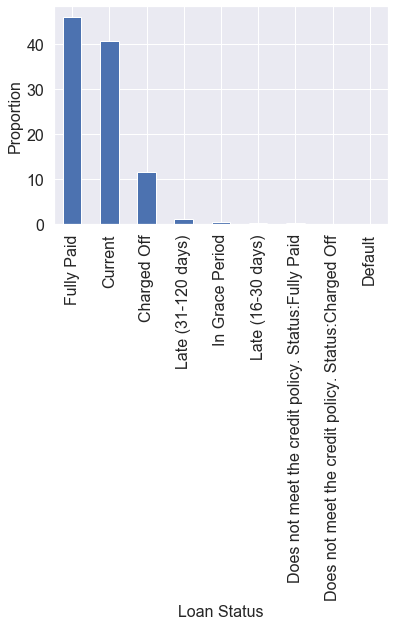

In [6]:
ax=(loan.loan_status.value_counts()*100/loan.shape[0]).plot(kind='bar')
#ax.title('asd')
plt.xlabel('Loan Status', fontsize = 16)
plt.ylabel('Proportion', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
#loan = loan.drop(['recoveries'], axis = 1)
#loan = loan.drop(['collection_recovery_fee'], axis = 1)

Consider Charged Off,Does not meet the credit policy. Status:Charged Off and Default as bad loans. Create a binary variable as bad loan and drop the loan status column 

In [8]:
bad_list=  ['Charged Off','Does not meet the credit policy. Status:Charged Off', 'Default' ]
good_list = ['Fully Paid', 'Late (31-120 days)' , 'In Grace Period', 'Late (16-30 days)',
             'Does not meet the credit policy. Status:Fully Paid']

loan['bad_loan'] = loan['loan_status'].replace(bad_list, [1]*len(bad_list))
loan['bad_loan'] = loan['bad_loan'].replace(good_list, [0]*len(good_list))
loan['bad_loan'] = loan['bad_loan'].replace(['Current'], [np.nan]*1)

loan = loan.drop(['loan_status'], axis = 1)

loan.bad_loan.value_counts()

0.0    1078526
1.0     262447
Name: bad_loan, dtype: int64

In [9]:
# loan.bad_loan.isnull().sum() + loan.bad_loan.value_counts()[0] + loan.bad_loan.value_counts()[1] 

In [10]:
loan.bad_loan.isnull().sum()*100/loan.shape[0]

40.68244430407295

40.6% of the loans are current and we do not know the outcome yet. So, let's use those loans in the test/scoring set. Rest 59.4% will be used as training and validation datasets 

In [11]:
scoring = loan[loan['bad_loan'].isnull()]
loan = loan[~loan['bad_loan'].isnull()]

In [12]:
# scoring.shape

In [13]:
# loan.shape

In [14]:
# loan.shape[0] + scoring.shape[0]

In [15]:
cols_more_50_percent =loan.columns[loan.isnull().mean() > 0.50]
loan.drop(cols_more_50_percent, axis=1, inplace=True)
loan.shape

(1340973, 88)

### Exploratory Analysis 

Text(0.5, 1.0, 'Invester amounts')

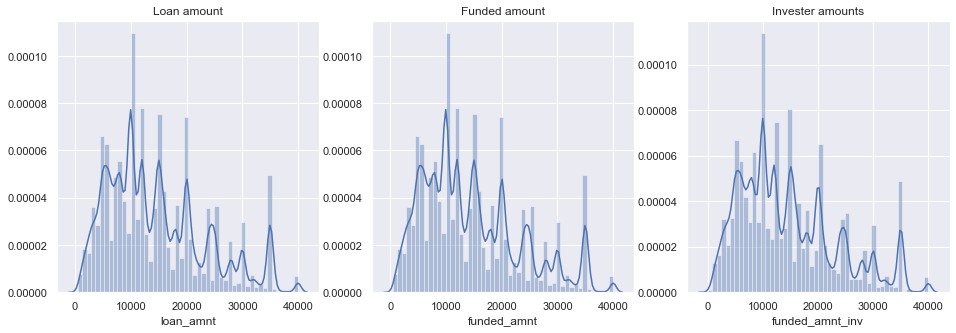

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loan['loan_amnt'], ax=ax[0]) ; ax[0].set_title("Loan amount")
sns.distplot(loan['funded_amnt'], ax=ax[1]); ax[1].set_title("Funded amount")
sns.distplot(loan['funded_amnt_inv'], ax=ax[2]) ; ax[2].set_title("Invester amounts")

### Term 

In [17]:
loan.term.value_counts()/loan.shape[0]

 36 months    0.754238
 60 months    0.245762
Name: term, dtype: float64

Around 75% of the loans are 36 months. Others are 60 months. 

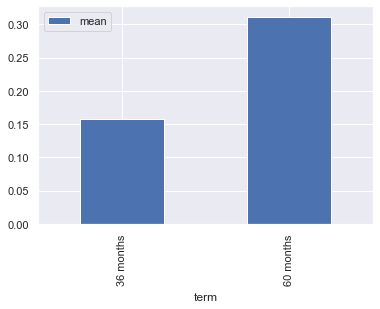

In [18]:
loan.groupby(['term'])['bad_loan'].agg(['mean']).plot(kind='bar')

### Harship flag

In [19]:
loan.hardship_flag.value_counts()

N    1340098
Y        875
Name: hardship_flag, dtype: int64

### initial_list_status

In [20]:
loan.initial_list_status.value_counts()

w    778292
f    562681
Name: initial_list_status, dtype: int64

### debt_settlement_flag

In [21]:
loan.debt_settlement_flag.value_counts()

N    1307942
Y      33031
Name: debt_settlement_flag, dtype: int64

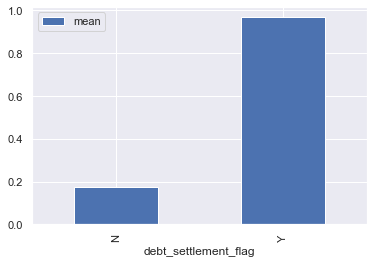

In [22]:
loan.groupby(['debt_settlement_flag'])['bad_loan'].agg(['mean']).plot(kind='bar')

In [23]:
loan['term_36'] = np.where(loan['term'] == '36 months', 1 , 0 )
loan = loan.drop('term', 1)

loan['pymnt_plan'] = np.where(loan['pymnt_plan'] == 'y', 1 , 0 )
#loan = loan.drop('term', 1)
loan['initial_list_status_w'] = np.where(loan['initial_list_status'] == 'w', 1 , 0 )
loan = loan.drop('initial_list_status', 1)

loan['hardship_flag'] = np.where(loan['hardship_flag'] == 'Y', 1 , 0 )
#loan = loan.drop('initial_list_status', 1)

#loan['debt_settlement_flag'] = np.where(loan['debt_settlement_flag'] == 'Y', 1 , 0 )


### interest rate 

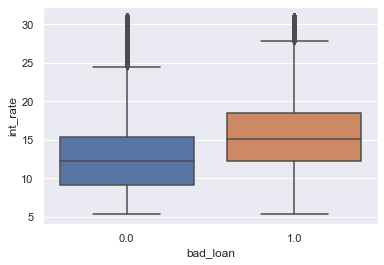

In [24]:
sns.boxplot(x= 'bad_loan', y = 'int_rate', data= loan)

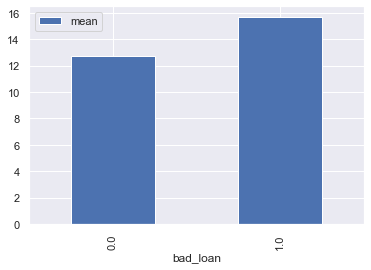

In [25]:
loan.groupby(['bad_loan'])['int_rate'].agg(['mean']).plot(kind='bar')

### Grade 

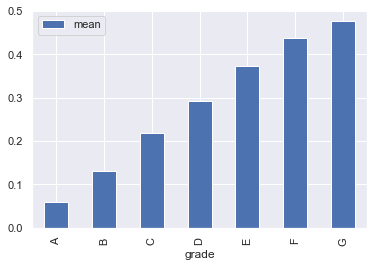

In [26]:
loan.groupby(['grade'])['bad_loan'].agg(['mean']).plot(kind='bar')

### subgrade 

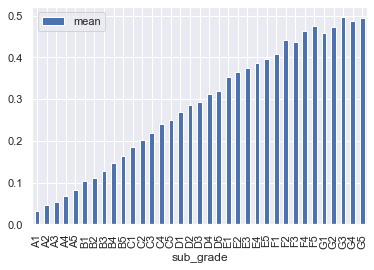

In [27]:
loan.groupby(['sub_grade'])['bad_loan'].agg(['mean']).plot(kind='bar')

Since both of these contain the similar information, I am ignore grade for now. Since sub_grade is more granualr, I will use it. It does increase dimensionality (when one-hot encoded) 

In [28]:
loan = loan.drop(['grade'], axis = 1)

### Employment title 

In [29]:
loan.emp_title.value_counts()

Teacher                                     21066
Manager                                     19308
Owner                                       10358
Registered Nurse                             8723
RN                                           8470
Supervisor                                   8279
Driver                                       7559
Sales                                        7435
Project Manager                              6300
Office Manager                               5477
General Manager                              5179
Director                                     4983
owner                                        4583
manager                                      4505
Engineer                                     4240
President                                    4159
teacher                                      4038
driver                                       3496
Vice President                               3488
Operations Manager                           3439


Too many unique values. Let's drop it 

In [30]:
loan = loan.drop(['emp_title'], axis = 1)

### Employment Length 

In [31]:
loan.emp_length.value_counts()

10+ years    439791
2 years      121342
< 1 year     108194
3 years      107330
1 year        88431
5 years       83932
4 years       80360
6 years       62592
8 years       60501
7 years       59450
9 years       50622
Name: emp_length, dtype: int64

### Home Ownership 

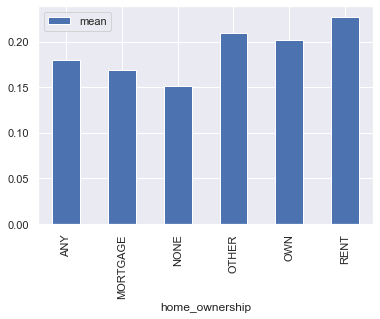

In [32]:
loan.groupby(['home_ownership'])['bad_loan'].agg(['mean']).plot(kind='bar')

### Annual Income 

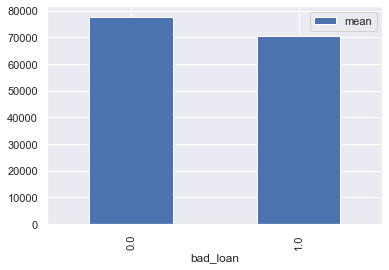

In [33]:
loan.groupby(['bad_loan'])['annual_inc'].agg(['mean']).plot(kind='bar')

### Payment Plan

In [34]:
loan.pymnt_plan.value_counts()

0    1340295
1        678
Name: pymnt_plan, dtype: int64

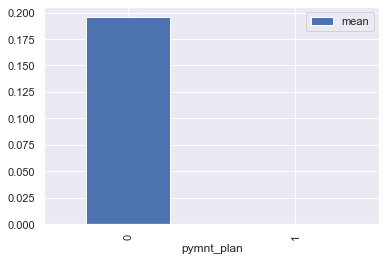

In [35]:
loan.groupby(['pymnt_plan'])['bad_loan'].agg(['mean']).plot(kind='bar')

Payment plan = yes has no bad loans. But is 678 enough to run into a conclusion? 

In [36]:
(loan.isnull().sum()*100/loan.shape[0]).sort_values(ascending = False)

mths_since_recent_inq         13.070435
num_tl_120dpd_2m               8.980792
mo_sin_old_il_acct             8.072049
emp_length                     5.848589
pct_tl_nvr_dlq                 5.252156
avg_cur_bal                    5.242387
mo_sin_rcnt_rev_tl_op          5.240747
mo_sin_old_rev_tl_op           5.240747
num_rev_accts                  5.240747
mo_sin_rcnt_tl                 5.240672
num_rev_tl_bal_gt_0            5.240672
num_accts_ever_120_pd          5.240672
num_actv_bc_tl                 5.240672
num_actv_rev_tl                5.240672
total_rev_hi_lim               5.240672
num_bc_tl                      5.240672
num_il_tl                      5.240672
num_op_rev_tl                  5.240672
tot_cur_bal                    5.240672
tot_coll_amt                   5.240672
num_tl_30dpd                   5.240672
num_tl_90g_dpd_24m             5.240672
num_tl_op_past_12m             5.240672
total_il_high_credit_limit     5.240672
tot_hi_cred_lim                5.240672


### loan_amnt, funded_amnt and funded_amnt_inv

In [37]:
loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999545,0.998213
funded_amnt,0.999545,1.000000,0.998776
funded_amnt_inv,0.998213,0.998776,1.000000


In [38]:
loan = loan.drop(['funded_amnt','funded_amnt_inv'], axis = 1)

### Zip code

In [39]:
print (loan.zip_code.nunique()) ; loan = loan.drop(['zip_code'], axis = 1)

946


### Policy code

In [40]:
print (loan.policy_code.nunique())  ;loan = loan.drop(['policy_code'], axis = 1) 

1


In [41]:
# #zero variance columns.. 
# (loan.nunique()*100/loan.shape[0]).sort_values()

### disbursement_method

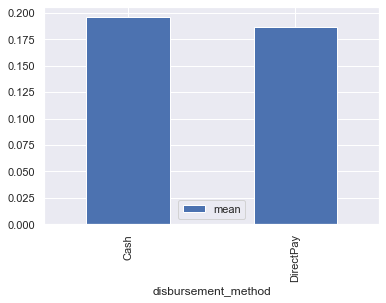

In [42]:
loan.groupby(['disbursement_method'])['bad_loan'].agg(['mean']).plot(kind='bar')

### hardship_flag

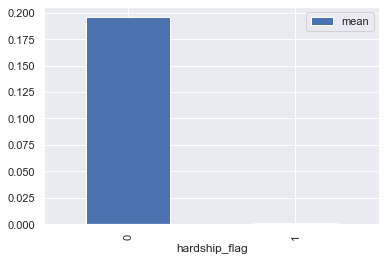

In [43]:
loan.groupby(['hardship_flag'])['bad_loan'].agg(['mean']).plot(kind='bar')

### application_type

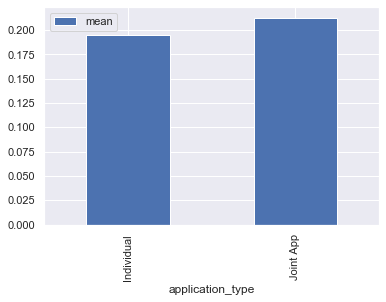

In [44]:
loan.groupby(['application_type'])['bad_loan'].agg(['mean']).plot(kind='bar')

In [45]:
#loan.groupby(['initial_list_status'])['bad_loan'].agg(['mean']).plot(kind='bar')

### Addr_state 

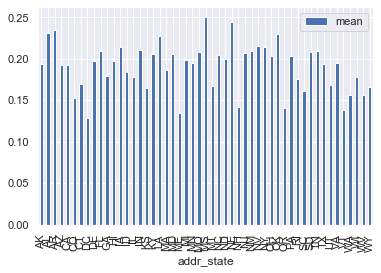

In [46]:
loan.groupby(['addr_state'])['bad_loan'].agg(['mean']).plot(kind='bar')

can reduce dimentionality by grouping into regions

In [47]:
loan = loan.drop(['addr_state'], axis = 1)

In [48]:
# loan.groupby(['title'])['bad_loan'].agg(['mean']).plot(kind='bar')

In [49]:
loan = loan.drop(['title'], axis = 1)


### Purpose 

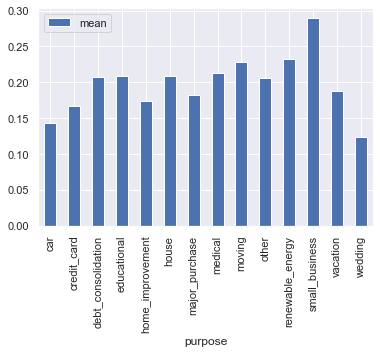

In [50]:
loan.groupby(['purpose'])['bad_loan'].agg(['mean']).plot(kind='bar')

### Transformation 

1) difference of days between earliest credit line and issued date 

In [51]:
loan['test'] = np.where(loan['last_pymnt_d'] == loan['last_credit_pull_d'], 1, 0  )
loan['issue_d'] = pd.to_datetime(loan.issue_d, dayfirst=True)
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, dayfirst=True)
loan['issue_earliest_diff'] = (loan['issue_d'] -  loan['earliest_cr_line']).dt.days
loan = loan.drop(['issue_d', 'earliest_cr_line' , 'last_pymnt_d', 'last_credit_pull_d'], axis = 1)

In [52]:
loan.select_dtypes(include=['object']).isnull().sum()

sub_grade                   0
emp_length              78428
home_ownership              0
verification_status         0
purpose                     0
application_type            0
disbursement_method         0
debt_settlement_flag        0
dtype: int64

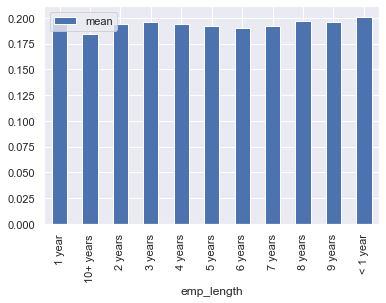

In [53]:
loan.groupby(['emp_length'])['bad_loan'].agg(['mean']).plot(kind='bar')

emp_length is a good feature (assumption). However, due to time constraints, I am not trying any advacned imputation. We could try imputing it based on employement, annual income etc.. For now, since I do not see much variation in the bad loan rate, I am ignoring this column 

In [54]:
loan.select_dtypes(include=['object']).isnull().sum()

sub_grade                   0
emp_length              78428
home_ownership              0
verification_status         0
purpose                     0
application_type            0
disbursement_method         0
debt_settlement_flag        0
dtype: int64

#### Train - test split

In [55]:
from sklearn.model_selection import train_test_split
drop_feat = ['out_prncp' , 'out_prncp_inv' , 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp', 
            'total_rec_late_fee', 'last_pymnt_amnt' , 'num_tl_120dpd_2m',  'num_tl_30dpd', 'recoveries', 
             'collection_recovery_fee', 'emp_length' ,'id', 'debt_settlement_flag']

loan= loan.drop(drop_feat, axis = 1)

features  = list(loan.columns)
len(features)
X = loan[features]
y = loan['bad_loan']
X = X.drop(['bad_loan', 'test'],axis=  1)


In [56]:
loan.select_dtypes(include=['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'disbursement_method'],
      dtype='object')

In [57]:
ohe_cols = [ 'sub_grade', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'application_type', 'disbursement_method'] 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y)

In [59]:
y_test.value_counts(normalize=True)

0.0    0.804286
1.0    0.195714
Name: bad_loan, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

0.0    0.804286
1.0    0.195714
Name: bad_loan, dtype: float64

### Missing value imputation: median for now 

In [61]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

### One hot encoding 

In [62]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train[ohe_cols])
train_ohe_df=pd.DataFrame(enc.transform(X_train[ohe_cols]).toarray())
train_ohe_df.columns = enc.get_feature_names()
X_train.reset_index(inplace=True)
X_train= X_train.drop(ohe_cols, 1)
X_train = pd.concat([X_train,train_ohe_df], axis = 1)
X_train.shape
X_train.drop('index', axis = 1, inplace=True)

In [63]:
test_ohe_df=pd.DataFrame(enc.transform(X_test[ohe_cols]).toarray())
test_ohe_df.columns = enc.get_feature_names()
X_test= X_test.drop(ohe_cols, 1)
X_test.reset_index(inplace=True)
X_test = pd.concat([X_test,test_ohe_df], axis = 1)
X_test.drop('index', axis = 1, inplace=True)
#X_test = pd.concat([X_test,test_ohe_df], axis = 1)
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,term_36,initial_list_status_w,issue_earliest_diff,x0_A1,x0_A2,x0_A3,x0_A4,x0_A5,x0_B1,x0_B2,x0_B3,x0_B4,x0_B5,x0_C1,x0_C2,x0_C3,x0_C4,x0_C5,x0_D1,x0_D2,x0_D3,x0_D4,x0_D5,x0_E1,x0_E2,x0_E3,x0_E4,x0_E5,x0_F1,x0_F2,x0_F3,x0_F4,x0_F5,x0_G1,x0_G2,x0_G3,x0_G4,x0_G5,x1_ANY,x1_MORTGAGE,x1_NONE,x1_OTHER,x1_OWN,x1_RENT,x2_Not Verified,x2_Source Verified,x2_Verified,x3_0,x3_1,x4_car,x4_credit_card,x4_debt_consolidation,x4_educational,x4_home_improvement,x4_house,x4_major_purchase,x4_medical,x4_moving,x4_other,x4_renewable_energy,x4_small_business,x4_vacation,x4_wedding,x5_Individual,x5_Joint App,x6_Cash,x6_DirectPay
0,9975,11.48,328.87,60000.0,18.98,0.0,1.0,14.0,0.0,26537,64.9,21.0,0.0,0.0,0.0,79383.0,24000.0,4.0,7322.0,4672.0,63.2,0.0,0.0,129.0,164.0,8.0,5.0,1.0,13.0,5.0,0.0,3.0,5.0,4.0,7.0,7.0,7.0,13.0,5.0,11.0,0.0,2.0,98.0,42.9,0.0,0.0,111663.0,37292.0,15000.0,31686.0,0,0,0,4079.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,13000,6.03,395.67,75956.0,21.08,0.0,0.0,18.0,0.0,12851,21.2,49.0,0.0,0.0,0.0,355891.0,60500.0,4.0,19772.0,47649.0,21.2,0.0,0.0,172.0,161.0,23.0,15.0,1.0,23.0,21.0,0.0,3.0,3.0,5.0,8.0,36.0,5.0,12.0,3.0,18.0,0.0,0.0,100.0,0.0,0.0,0.0,430740.0,144066.0,60500.0,151990.0,0,0,0,5235.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2400,8.99,76.31,55000.0,24.39,0.0,0.0,16.0,0.0,15558,46.9,23.0,0.0,0.0,0.0,89515.0,33200.0,2.0,5968.0,2609.0,80.4,0.0,0.0,112.0,108.0,12.0,12.0,0.0,13.0,12.0,0.0,4.0,7.0,5.0,5.0,13.0,9.0,10.0,7.0,16.0,0.0,1.0,100.0,75.0,0.0,0.0,105341.0,89515.0,13300.0,72141.0,0,0,1,3441.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12000,13.99,279.16,71247.0,2.81,0.0,0.0,4.0,1.0,3319,89.7,5.0,0.0,0.0,0.0,9777.0,3700.0,1.0,2444.0,381.0,89.7,0.0,0.0,121.0,141.0,15.0,15.0,0.0,15.0,5.0,0.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,4.0,0.0,0.0,100.0,100.0,0.0,0.0,10946.0,9777.0,3700.0,7246.0,0,0,1,4291.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,19750,15.61,476.20,45000.0,18.48,0.0,0.0,7.0,0.0,5100,15.5,15.0,0.0,0.0,0.0,35263.0,33000.0,6.0,5038.0,17400.0,22.7,0.0,0.0,125.0,185.0,6.0,2.0,0.0,8.0,6.0,0.0,1.0,1.0,3.0,6.0,6.0,5.0,9.0,1.0,7.0,0.0,4.0,100.0,0.0,0.0,0.0,71258.0,35263.0,22500.0,38258.0,0,0,0,5663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### highly correlated features

In [64]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['installment',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'tot_hi_cred_lim',
 'x3_1',
 'x5_Joint App',
 'x6_DirectPay']

In [65]:
X_train = X_train.drop(to_drop, 1)
X_test = X_test.drop(to_drop, 1)

In [66]:
X_train.shape


(1005729, 111)

In [67]:
X_test.shape

(335244, 111)

### Random forest: taking too much time on local machine

In [68]:
# from sklearn.model_selection import StratifiedKFold
# n_optimal_param_grid = {'bootstrap': [True],  'max_depth': [10], 
#     'min_samples_leaf': [1],  'min_samples_split': [2],
#     'n_estimators': [20]
# }
# rf = RandomForestClassifier(random_state=42)

# nn_grid_search = GridSearchCV(estimator = rf, param_grid = n_optimal_param_grid, 
#                           cv =StratifiedKFold(), n_jobs = 1, verbose = 2)
# nn_grid_search.fit(X_train, y_train)

# y_pred = nn_grid_search.predict(X_test)

In [69]:
# nn_grid_search.best_params_

In [70]:
# rf= RandomForestClassifier(random_state=42,bootstrap=nn_grid_search.best_params_['bootstrap'],
#                           max_depth= nn_grid_search.best_params_['max_depth'],
#                            min_samples_leaf= nn_grid_search.best_params_['min_samples_leaf'],
#                           min_samples_split= nn_grid_search.best_params_['min_samples_split'],
#                           n_estimators= nn_grid_search.best_params_['n_estimators'])

# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

In [71]:
# accuracy_score(y_pred, y_test)

In [72]:
# confusion_matrix(y_pred, list(y_test))

In [73]:
# feature_importance = np.array(rf.feature_importances_)
# feature_names = np.array(X_train.columns)

#     #Create a DataFrame using a Dictionary
# data={'feature_names':feature_names,'feature_importance':feature_importance}
# fi_df = pd.DataFrame(data)

#     #Sort the DataFrame in order decreasing feature importance
# fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


In [74]:
# top_features = fi_df['feature_names'][:20].values

### Model 1 

### Cross Validation 

In [75]:


# grid={"C":np.logspace(-3,3,7), "penalty":["l1"]}
# logisticRegr = LogisticRegression()

# logreg_cv=GridSearchCV(logisticRegr,grid,cv=5,scoring = 'recall')
# logreg_cv.fit(X_train,y_train)
# # all parameters not specified are set to their defaults
# #)
# #lgisticRegr.fit(X_train, y_train)
# predictions = logreg_cv.predict(X_test)
# #predictions_actual = logisticRegr.predict(test)

# print ("Accuracy: {}".format(accuracy_score(predictions, y_test)) )
# print ("F1 Score: {}".format(f1_score(predictions, y_test, average='weighted')))
# print ("AUC: {}".format(roc_auc_score(predictions, y_test)) )


In [76]:
#np.logspace(-3,3,7)

In [77]:
#logreg_cv.best_params_ 

In [78]:
#best model 
log_reg = LogisticRegression( C=0.001 ,penalty = 'l1' ,random_state  = 42 )
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
predictions = log_reg.predict(X_test)

In [80]:
print ("Accuracy: {}".format(accuracy_score(predictions, y_test)) )
print ("F1 Score: {}".format(f1_score(y_test, predictions, average='weighted')))
print ("AUC: {}".format(roc_auc_score(y_test, predictions)) )
print(classification_report(y_test, predictions))

Accuracy: 0.8044140983880398
F1 Score: 0.7336395241465291
AUC: 0.5186064679444091
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89    269632
         1.0       0.50      0.05      0.09     65612

    accuracy                           0.80    335244
   macro avg       0.66      0.52      0.49    335244
weighted avg       0.75      0.80      0.73    335244



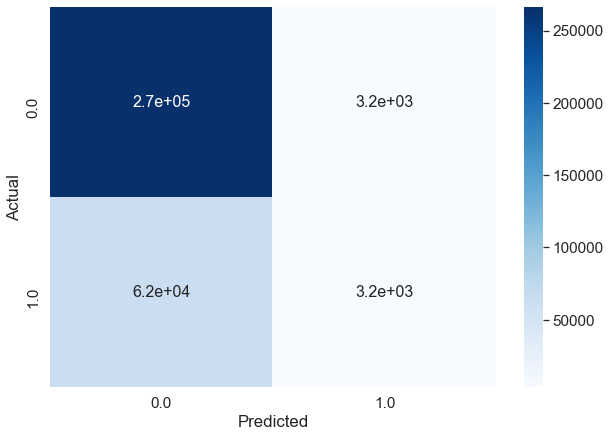

In [81]:
data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [82]:
print ('False Negative Rate: {}'.format(data[1][0]/len(y_test)))
print ('False Positive Rate: {}'.format(data[0][1]/len(y_test)))

False Negative Rate: 0.18613010225388077
False Positive Rate: 0.009455799358079489


In [83]:
logReg_coeff = pd.DataFrame({'feature_name': X_train.columns, 'model_coefficient': log_reg.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff

,feature_name,model_coefficient
48,initial_list_status_w,8.737178e-02
1,int_rate,8.578938e-02
16,acc_open_past_24mths,4.273404e-02
31,num_actv_rev_tl,3.240577e-02
7,pub_rec,1.875876e-02
5,inq_last_6mths,1.850076e-02
4,delinq_2yrs,1.436696e-02
63,x0_C4,1.431092e-02
3,dti,9.279035e-03
34,num_il_tl,6.000439e-03


### Model 2 

### Feature Selection: Remove zero coefficient features

In [84]:
zero_coef =logReg_coeff[logReg_coeff.model_coefficient == 0 ]['feature_name'].values
select_features = [i for i in X_train.columns if i not in zero_coef] 

In [85]:
log_reg = LogisticRegression( C=0.001 ,penalty = 'l1',random_state  = 42 )
log_reg.fit(X_train[select_features],y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predictions = log_reg.predict(X_test[select_features])

In [87]:
print ("Accuracy: {}".format(accuracy_score(predictions, y_test)) )
print ("F1 Score: {}".format(f1_score(y_test,  predictions,average='weighted')))
print ("AUC: {}".format(roc_auc_score( y_test,predictions)) )

print(classification_report(y_test, predictions))

Accuracy: 0.8044111154860341
F1 Score: 0.7336145015512324
AUC: 0.5185757826755422
              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89    269632
         1.0       0.50      0.05      0.09     65612

    accuracy                           0.80    335244
   macro avg       0.66      0.52      0.49    335244
weighted avg       0.75      0.80      0.73    335244



In [88]:
logReg_coeff = pd.DataFrame({'feature_name': X_train[select_features].columns, 'model_coefficient': log_reg.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff

,feature_name,model_coefficient
37,initial_list_status_w,8.722237e-02
1,int_rate,8.576876e-02
14,acc_open_past_24mths,4.273248e-02
27,num_actv_rev_tl,3.245343e-02
7,pub_rec,1.876365e-02
5,inq_last_6mths,1.844188e-02
4,delinq_2yrs,1.431501e-02
39,x0_C4,1.424129e-02
3,dti,9.257774e-03
30,num_il_tl,5.824717e-03


In [89]:
# predictions = log_reg.predict(X_test[select_features])

### Classfication report

In [90]:

# print(classification_report(y_test, predictions))

In [91]:
# roc_auc_score(y_test, predictions)

### ROC Curve

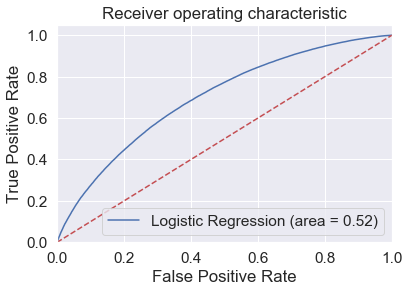

In [92]:

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test[select_features]))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test[select_features])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Threshold Selection 

In [93]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.192777, G-Mean=0.643


In [94]:
predictions_prob = log_reg.predict_proba(X_test[select_features])
#yhat =predictions_prob[:, 1]

### ROC Curve

Best Threshold=0.192777, G-Mean=0.643


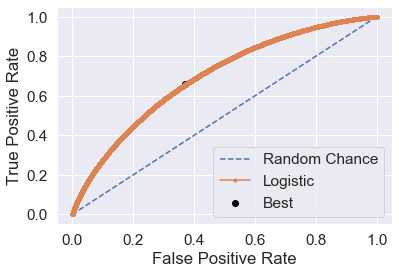

In [95]:

# pr curve for logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
# calculate roc curves
#fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random Chance')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [96]:
pred_prob = []
for i,v in enumerate(predictions_prob):
    pred_prob.append(predictions_prob[i][1])

new_items = [1 if x > thresholds[ix] else 0 for x in pred_prob]

In [97]:
roc_auc_score(y_test, new_items)

0.6430357663500041

### Classification report


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, new_items))

              precision    recall  f1-score   support

         0.0       0.88      0.63      0.73    269632
         1.0       0.30      0.66      0.41     65612

    accuracy                           0.63    335244
   macro avg       0.59      0.64      0.57    335244
weighted avg       0.77      0.63      0.67    335244



### Confusion matrix


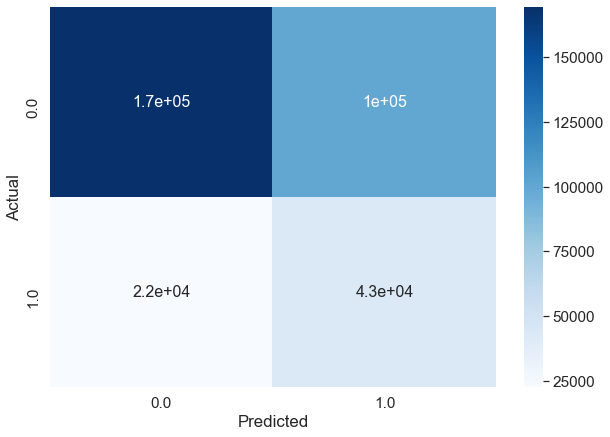

In [99]:
data = confusion_matrix(y_test, new_items)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [100]:
data

array([[169462, 100170],
       [ 22467,  43145]], dtype=int64)

In [101]:
print ('False Negative Rate: {}'.format(data[1][0]/len(y_test)))

print ('False Positive Rate: {}'.format(data[0][1]/len(y_test)))

False Negative Rate: 0.06701685936213624
False Positive Rate: 0.29879729391130044


In [102]:
86000/len(y_test)

0.2565295724904845

Imbalance, metrics, roc curve, confusion matrix 

In [103]:
import statsmodels.api as sm 
import pandas as pd 

In [104]:
log_reg = sm.Logit(list(y_train), X_train[select_features]).fit() 

Optimization terminated successfully.
         Current function value: 0.458121
         Iterations 6


In [105]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1005729
Model:                          Logit   Df Residuals:                  1005685
Method:                           MLE   Df Model:                           43
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                 0.07338
Time:                        21:39:03   Log-Likelihood:            -4.6075e+05
converged:                       True   LL-Null:                   -4.9724e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
loan_amnt                   2.374e-05    3.8e-07     62.461      0.000     2.3e-05    2.45e-05
int_rate                       0.0814      0.001    130.956      0.000       0.080 

In [106]:
# corr_matrix = X_train.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# to_drop